### Jesriel John Sarambao<br>
### Jerico Delos Reyes Jr.<br>
### Nhyko Miguel Salonga<br>
### CPE31S3<br>
### CPE 312 - Predictive Analytics using Machine Learning


# Final Project

*Introduction*

*The dataset is a collection of different attacks from a typical US Air Force LAN. It simulated what attacks are present in a military network environment with the purpose for assessment. The data consists of raw TCP/UP dump data for a network. Each connection is composed of a series of TCP packets from specific times in which a source IP address travels to a target IP address in a specific protocol. In addition, each connection is labelled either as normal or anomalous depending on the attack that is apparent on the data.*

*Dataset*

*Each connection has a size of almost 100 bytes. There is a combination of three qualitative and thirty-eight quantitative features which is forty-one features in total. They are all extracted from the said TCP/IP connection and distinguished as normal or anomalous. The class column houses the categories for these categories of normal and anomalous. Therefore, the class column is the target column.*

*Resources*

*In this project, the students used jupyter notebook and google colab as their python compilers. They also utilised different python modules such as sklearn, pandas, and numpy. In addition, the data scientists used different modules to create and manipulate data frames. Seaborn was used to create more colourful and advanced statistical plots. While, matplotlib also as a data visualisation in python in a simple manner and it connects to numpy and pandas. Sklearn had different uses such as performing grid search to find the optimal parameters, label encoder, and splitting the data. Furthermore, the different machine learning algorithms were used through sklearn. At the same time, all of the metrics presented used sklearn*

### Importing required modules and google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from matplotlib import colors
%matplotlib inline

# Model selection and Data Preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Metrics and Evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import fowlkes_mallows_score


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Importing data set

In [ ]:
#Importing Dataset : Network Intrusion Detection
#Source : Kaggle : https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection?select=Train_data.csv

# Google Colab Runtime
# from google.colab import drive
# drive.mount('/content/drive/')
# sup = "/content/drive/MyDrive/CPE_312/NID_Train.csv"
# data = pd.read_csv(sup)

# Local Runtime
sup = "/content/drive/MyDrive/Colab Notebooks/CPE 019 - CPE32S6/Datasets/Copy of Train_data.csv"
data = pd.read_csv(sup)
data_bak = data.copy()

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### Determine the number of datapoints, columns and data types

In [ ]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

### Do data cleaning such as removing empty values(NaN), replacing missing data

In [ ]:
encode = LE()

In [ ]:
cols = ['protocol_type', 'service', 'flag']
for i in cols:
  data[i] = encode.fit_transform(data[i])
data['class'] = encode.fit_transform(data['class'])

In [ ]:
#Checking it again
data.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

#### Remove unneccesary columns

<AxesSubplot:>

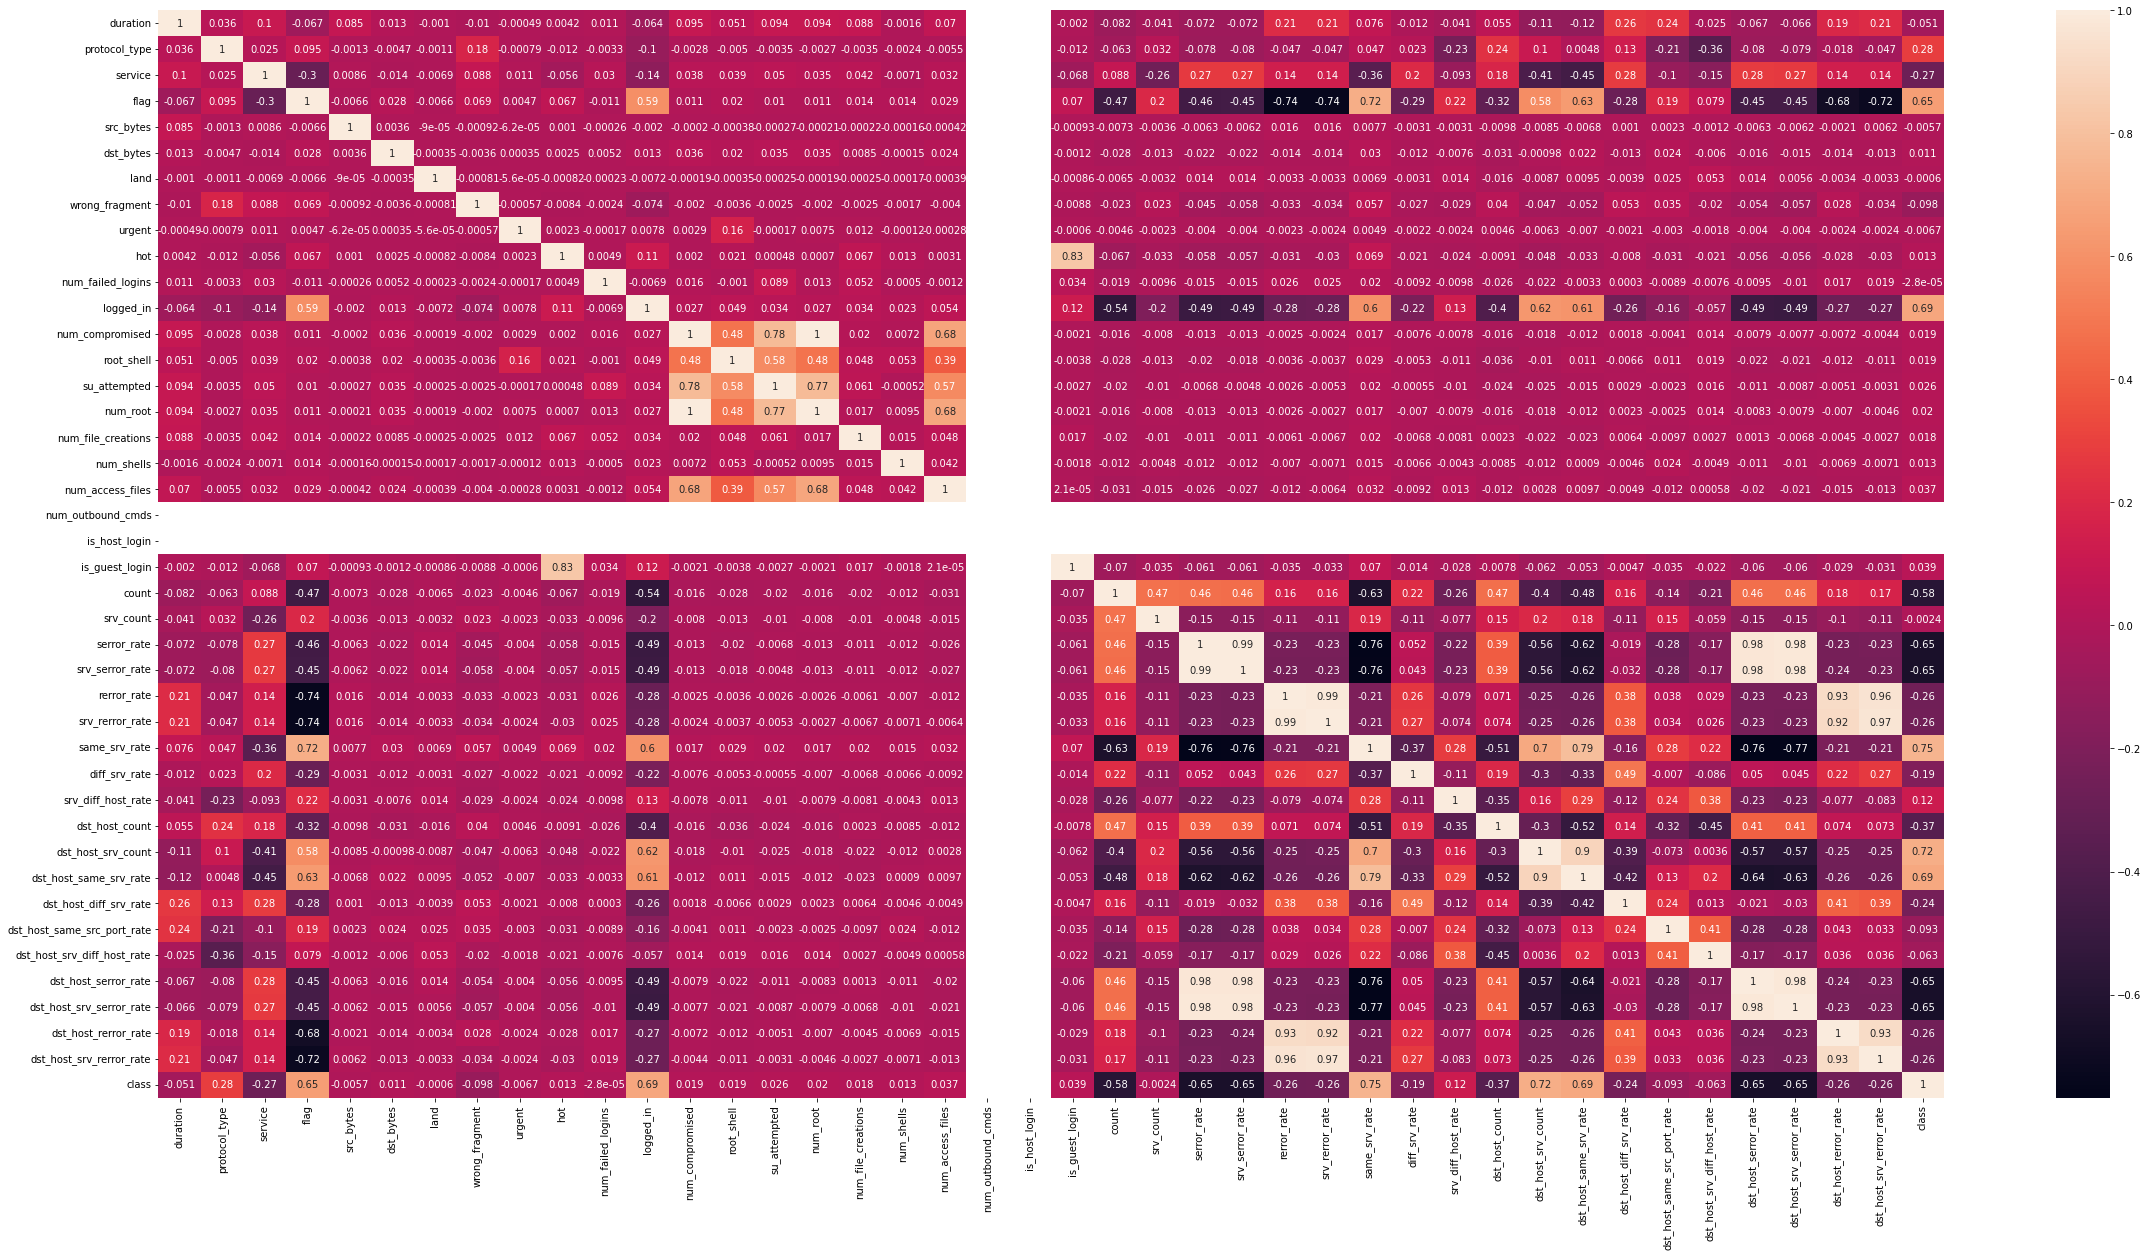

In [ ]:
#Get Correlations
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(), annot=True)

In [ ]:
#Delete NaN values/columns
cols = ["num_outbound_cmds", "is_host_login"]
data = data.drop(columns=cols)

#This can also be used for clustering later on
cluster_data = data.copy()

In [ ]:
#Select features based on correlation values
cols = ['class', 'protocol_type', 'service', 'flag', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
delet = [i for i in data.columns if i not in cols]
data = data.drop(columns=delet)

cluster_data2 = data.copy()

<AxesSubplot:>

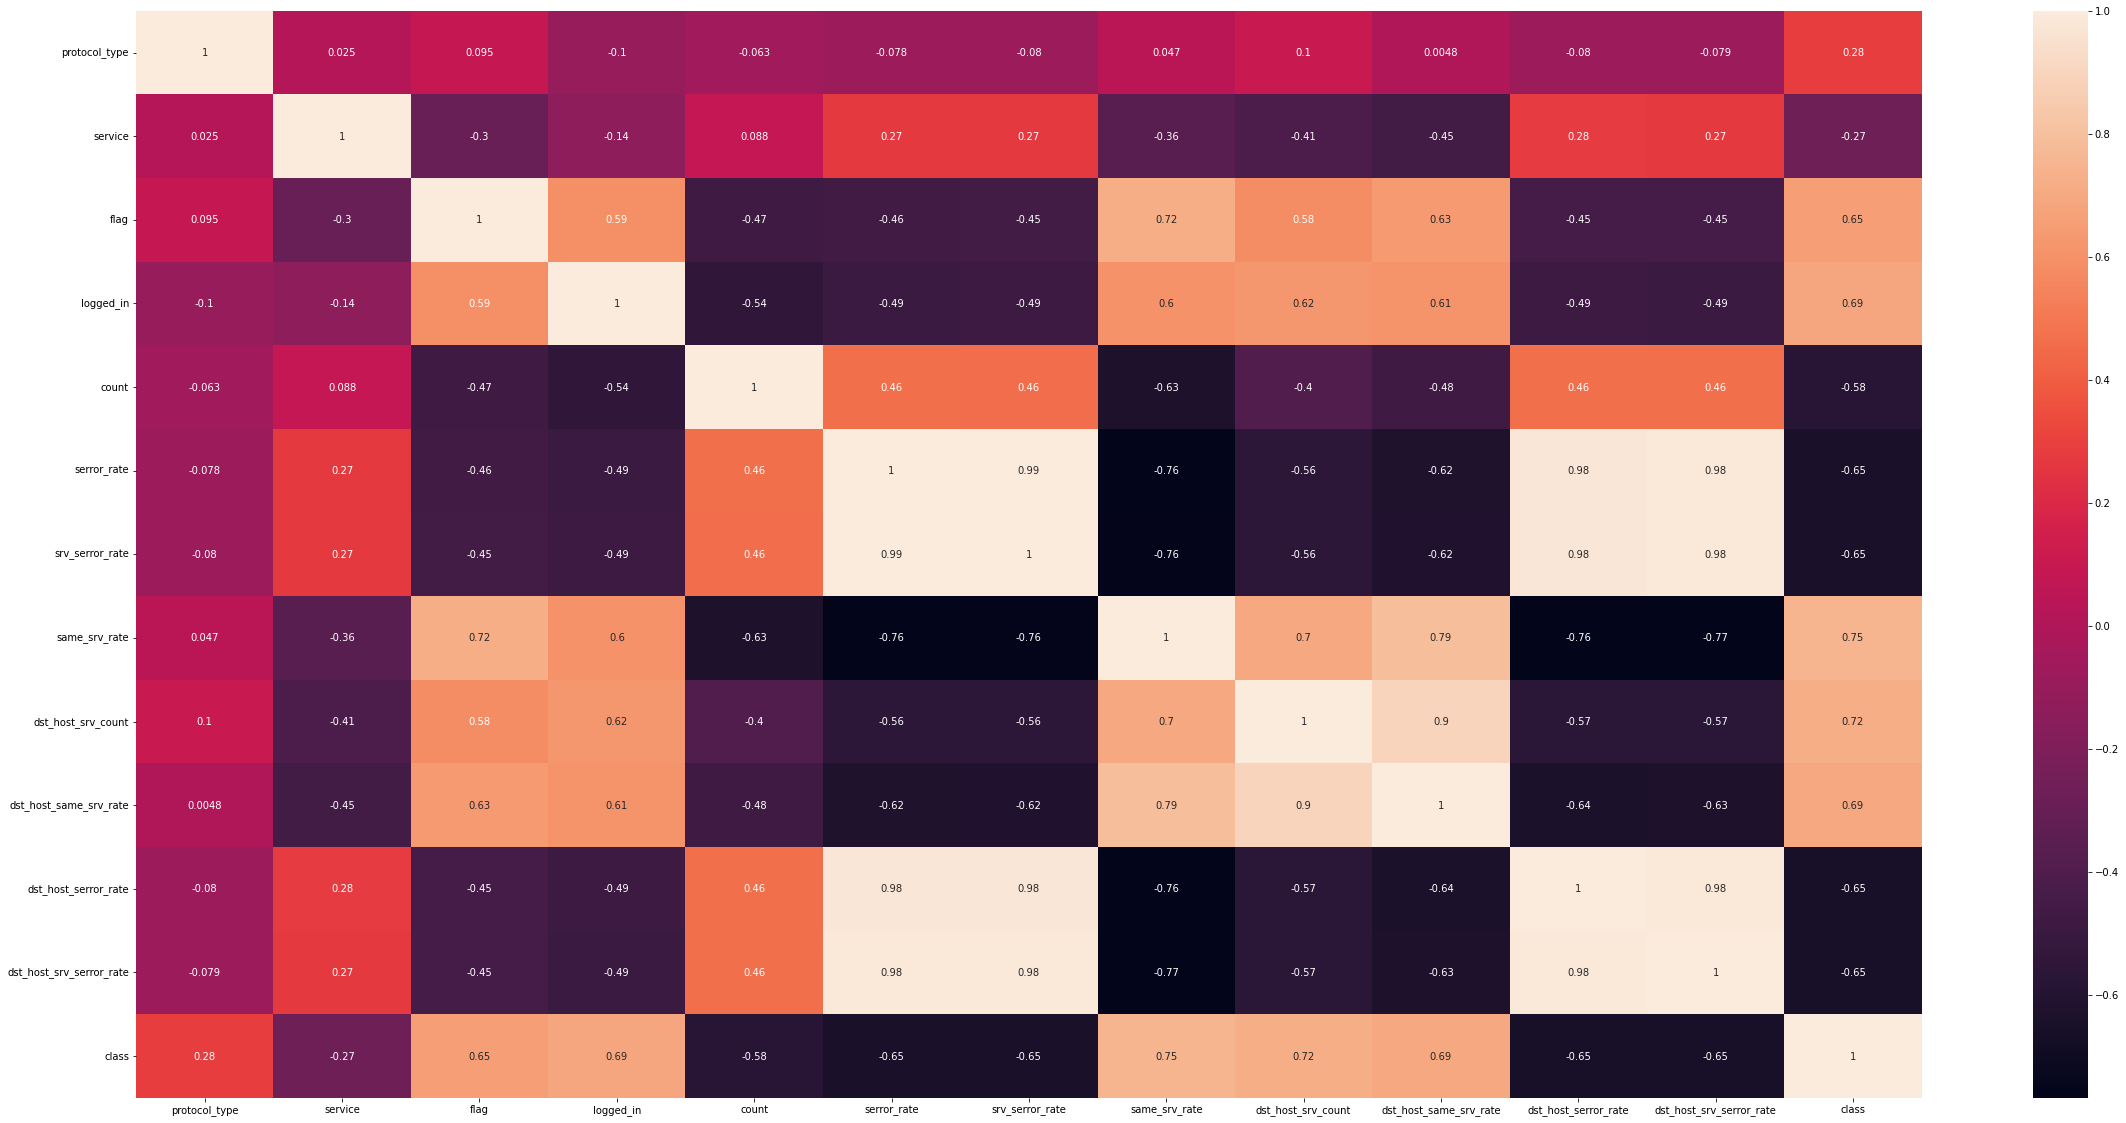

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

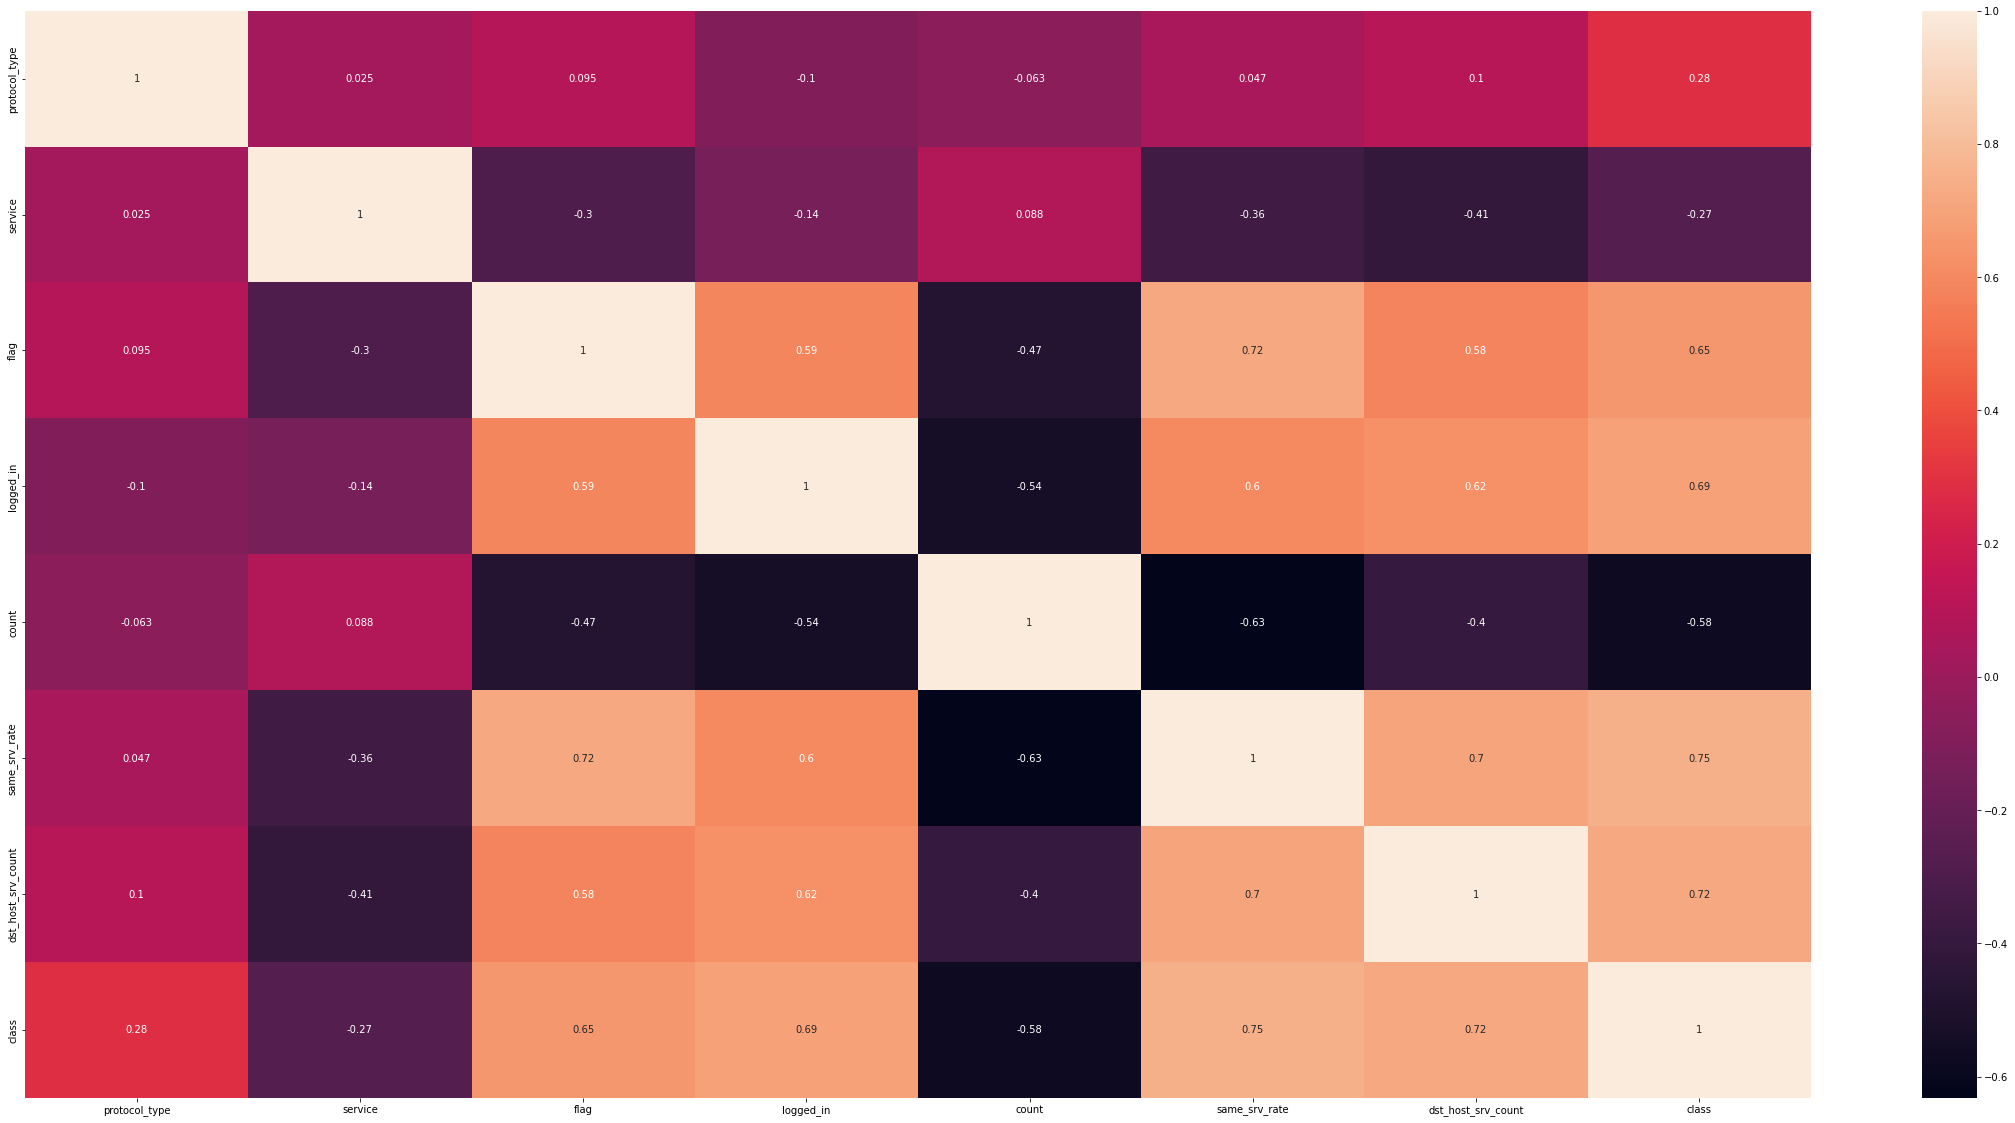

In [ ]:
#Fix multicollinearity
delet = ['dst_host_serror_rate', 'dst_host_srv_serror_rate', 'serror_rate', 'srv_serror_rate', 'dst_host_same_srv_rate']
data = data.drop(columns=delet)
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(), annot=True)

### Perform descriptive statistics such as mean, median and mode

In [ ]:
data.describe()

,protocol_type,service,flag,logged_in,count,same_srv_rate,dst_host_srv_count,class
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,1.053827,29.039139,6.982455,0.394768,84.591180,0.660559,115.063036,0.533860
std,0.426998,15.555601,2.679322,0.488811,114.673451,0.439637,110.646850,0.498862
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,5.000000,0.000000,2.000000,0.090000,10.000000,0.000000
50%,1.000000,22.000000,9.000000,0.000000,14.000000,1.000000,61.000000,1.000000
75%,1.000000,46.000000,9.000000,1.000000,144.000000,1.000000,255.000000,1.000000
max,2.000000,65.000000,10.000000,1.000000,511.000000,1.000000,255.000000,1.000000


<u>***Four of the columns that were left in the dataset were converted categorical values, so their descriptive statistics were pretty much normal. the logged_in feature is a binary variable, and since the mean of the said feature is 0.39, we can say that atleast 61% of the dataset have 0 values, or in other words, most of the recorded packets did not ask for login.***</u>

### Perform data visualization

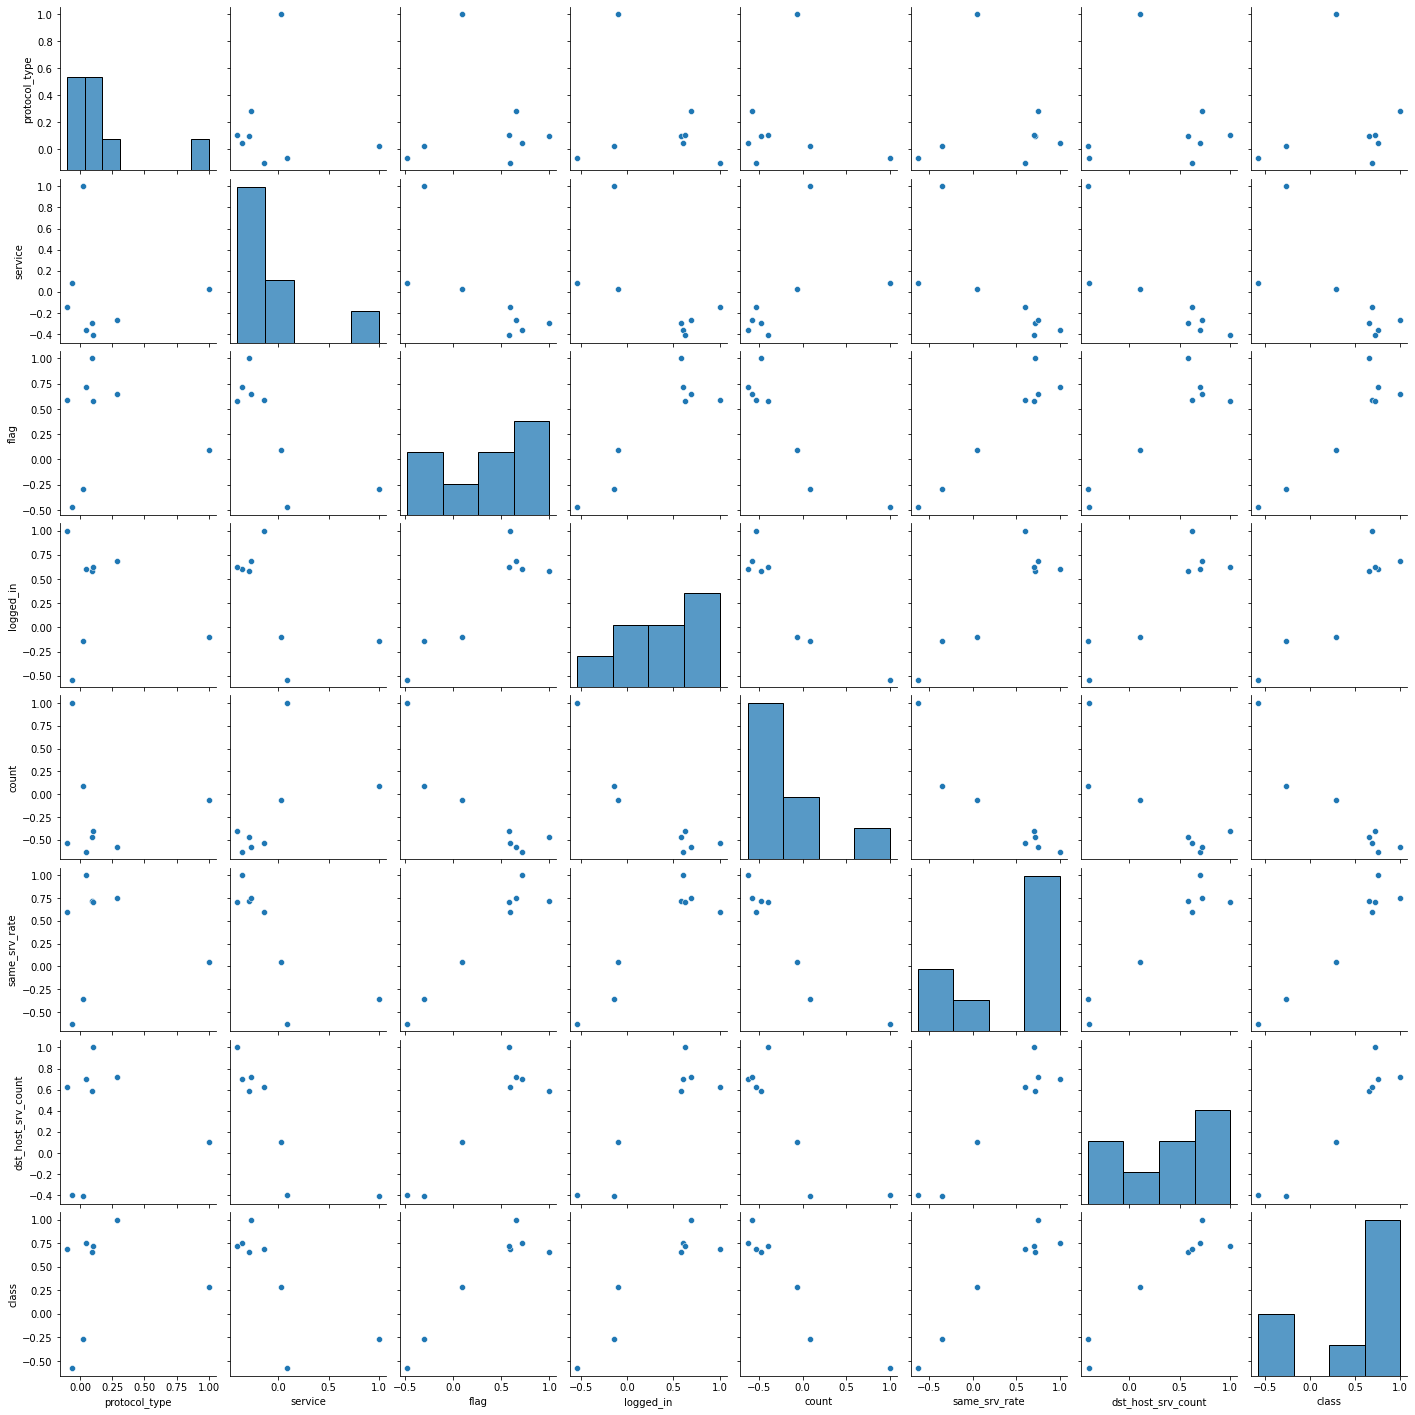

In [ ]:
sns.pairplot(data.corr())

### Data Splitting

In [ ]:
#Splitting data
x = data.drop(columns=['class'])
Y = data['class']
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.30)

LR_X = data.drop(columns=['class', 'dst_host_srv_count', 'flag'])
LR_y = data['class']
LRX_train, LRX_test, LRy_train, LRy_test = train_test_split(LR_X, LR_y, test_size=0.30)

cluster_data_X = cluster_data.drop(columns='class')
cluster_data_y = cluster_data['class']
CX_train, CX_test, Cy_train, Cy_test = train_test_split(cluster_data_X, cluster_data_y, test_size=0.30)

cluster_data2_X = cluster_data2.drop(columns='class')
cluster_data2_y = cluster_data2['class']
CX2_train, CX2_test, Cy2_train, Cy2_test = train_test_split(cluster_data2_X, cluster_data2_y, test_size=0.30)

## Model fitting for Supervised Learning Algorithms

Supervised Learning, is a type of Machine Learning model, where the training data is labelled. This allows the Machine Learning Algorithms to check whether a prediction is right or wrong, as well as the ability to fine tune the algorithm to further optimize and improve its accuracy in prediction. Examples of Supervised Learning Algorithm are Logistic Regression, Random Forest, K Nearest Neighbors, SVM, and more.


In [ ]:
LR_X

,protocol_type,service,logged_in,count,same_srv_rate
0,1,19,0,2,1.00
1,2,41,0,13,0.08
2,1,46,0,123,0.05
3,1,22,1,5,1.00
4,1,22,1,30,1.00
...,...,...,...,...,...
25187,1,16,0,100,0.07
25188,1,19,1,1,1.00
25189,1,46,0,105,0.07
25190,1,38,0,129,0.14


### Logistic Regression

In [ ]:
LogReg = LR(max_iter = 9000).fit(LRX_train, LRy_train)
LRPred = LogReg.predict(LRX_test)

In [ ]:
print(classification_report(LRy_test,LRPred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3583
           1       0.94      0.95      0.94      3975

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558



This is the classification report of our Logistic Regression Model. As we can see, It has high precision, high recall, but the Accuracy is still not the high enough to reach the required accuracy value. Its parameters were already set to meet the best possible score. Still, with high recall and precision, the model is deemed to have low chance of misclassification.

In [ ]:
print(f'Training Accuracy: {accuracy_score(LRy_train, LogReg.predict(LRX_train))}')

Training Accuracy: 0.940342520131564


As we can see from its training accuracy, the model did not show any sign of Overfitting, which is a scenario where the training accuracy is so high, it looks like it has already memorized the data. It did not also show signs of Underfitting, where training accuracy is so low, as compared to the testing accuracy where the accuracy is so high

### Decision Trees

In [ ]:
DT = DecisionTreeClassifier(max_depth=13, max_features=6).fit(X_train,y_train)
DTPred = DT.predict(X_test)

In [ ]:
print(classification_report(y_test,DTPred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3578
           1       0.96      0.99      0.97      3980

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



Decision Tree is a Supervised Learning algorithm that uses the concept of Entropy, Homogeneity, and Information gain to calculate the possibility of a certain outcome. Due to that, the model resulted in a very high Precision, Recall, and Accuracy as seen on the Classification report

In [ ]:
print(f'Training Accuracy: {accuracy_score(y_train, DT.predict(X_train))}')

Training Accuracy: 0.9849722127707837


Again, it did not show any signs of Overfitting, nor Underfitting, which is very good when creating Machine Learning models

### Random Forest

In [ ]:
RanFor = RF(n_estimators=400, criterion='entropy', max_depth=15, max_features='log2').fit(X_train, y_train)
RFPred = RanFor.predict(X_test)
print(classification_report(y_test,RFPred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3578
           1       0.96      0.99      0.98      3980

    accuracy                           0.98      7558
   macro avg       0.98      0.97      0.98      7558
weighted avg       0.98      0.98      0.98      7558



Random Forests are an upgraded version of Decision Trees, where it uses the concept of Bagging. Random Forests are a group of Decision Trees formulating various outputs. Then, its outputs will then be voted to know what's the best. Since it is an improved Decision Tree, we can also see improvements on its Metrics, as seen in the Classification Report.

In [ ]:
print(f'Training Accuracy: {accuracy_score(y_train, RanFor.predict(X_train))}')

Training Accuracy: 0.9887149824203244


Again, it did not show any signs of Overfitting, nor Underfitting, which is very good for Machine Learning models

### K Nearest Neighbors (KNN)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)
KNNPred = KNN.predict(X_test)
print(classification_report(y_test,KNNPred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3578
           1       0.95      0.98      0.97      3980

    accuracy                           0.96      7558
   macro avg       0.96      0.96      0.96      7558
weighted avg       0.96      0.96      0.96      7558



K Nearest Neighbors is a Supervised Learning algorithm that bases its predictions on the proximity of the other points. As seen on the Classification Report, it shows high Precision and Recall, as well as a good Accuracy value. Low Misclassification means that the points are scaled right, and the Algorithm is doing well in its predictions

In [ ]:
print(f'Training Accuracy: {accuracy_score(y_train, KNN.predict(X_train))}')

Training Accuracy: 0.9913235794487921


Again, it did not show any signs of Overfitting, nor Underfitting, which is very good when creating Machine Learning models

### Support Vector Machines (SVM)

In [ ]:
SVCM = SVC(kernel='rbf', gamma = 0.01, C = 10, probability=True).fit(X_train, y_train)
SVCPred = SVCM.predict(X_test)
print(classification_report(y_test, SVCPred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3578
           1       0.96      0.99      0.97      3980

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



Support Vector Machines is a type of Machine Learning algorithm that is similar to Logistic regression, but with the addition of Hyperplane, which is the decision boundary for SVM. Based on the Classification Report, it showed high precision recall, as well as high Accuracy score.

In [ ]:
print(f'Training Accuracy: {accuracy_score(y_train, SVCM.predict(X_train))}')

Training Accuracy: 0.9769195871611659


Again, it did not show any signs of Overfitting, nor Underfitting, which is very good when creating Machine Learning models

### XGBoost

In [ ]:
GB = GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42, subsample=0.5).fit(X_train, y_train)
GBPred = GB.predict(X_test)
print(classification_report(y_test, GBPred))
print(accuracy_score(y_test, GBPred))
print(f'Training Accuracy: {accuracy_score(y_train, GB.predict(X_train))}')

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3578
           1       0.96      0.99      0.97      3980

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558

0.9723471817941254
Training Accuracy: 0.9806056481796529


Gradient Boosting runs in the concept of iterative improvement. The best possible model will be combined with the other previous models, resulting to an even better Machine Learning model. As seen on its Classification Report, it shows exceptional precision and recall, as well as Accuracy. The model shows low number of misclassifications, and high number of correct predictions. We can also see from the Training accuracy that it does not show any forms of Underfitting, nor Overfitting

### Voting / Stacking Model

In [ ]:
estimators = [('Random Forest', RanFor), ('XGBoosting', GB), ('SVM', SVCM)]
Stack = VotingClassifier(estimators, voting='soft').fit(X_train, y_train)
StackPred = Stack.predict(X_test)
print(classification_report(y_test, StackPred))
print(f'Training Accuracy: {accuracy_score(y_train, Stack.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, StackPred)}')

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3578
           1       0.96      0.99      0.97      3980

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558

Training Accuracy: 0.9811160258591357
Testing Accuracy: 0.9726118020640381


Voting models uses the concept of aggregation in its estimators. It runs all of its estimators, aggregates their results, making them as one, resulting to an even better ML Model. Again, it shows exceptional results in its Classification Report, and does not seem to show any sign of Underfitting nor Overfitting on the model

## Metrics for Supervised Learning Algorithms

In [ ]:
model_dictionary = [{'estimator' : LogReg, 'type' : 'Logistic Regression', 'predictions': LRPred, 'train_data': [LRX_train, LRy_train], 'test_data': [LRX_test, LRy_test]},
                    {'estimator' : DT, 'type' : 'Decision Trees', 'predictions': DTPred},
                    {'estimator' : RanFor, 'type' : 'Random Forest', 'predictions': RFPred},
                    {'estimator' : KNN, 'type' : 'K Nearest Neighbors', 'predictions': KNNPred},
                    {'estimator' : SVCM, 'type' : 'Support Vector Machine', 'predictions': SVCPred},
                    {'estimator' : GB, 'type' : 'XGBoost', 'predictions': GBPred},
                    {'estimator' : Stack, 'type' : 'Stack/Voting Algorithm', 'predictions': StackPred}]

### Accuracy

In [ ]:
accuracy_data = pd.DataFrame(columns=['Test type', 'Test Accuracy', 'Train Accuracy'])
for i in model_dictionary:
    try:
        temp = pd.DataFrame({'Test type': [i['type']],
                             'Test Accuracy': [accuracy_score(i['test_data'][1],i['predictions'])],
                             'Train Accuracy' : [accuracy_score(i['train_data'][1], i['estimator'].predict(i['train_data'][0]))]},
                             index=[0])
    except KeyError:
        temp = pd.DataFrame({'Test type': [i['type']],
                             'Test Accuracy': [accuracy_score(y_test,i['predictions'])],
                             'Train Accuracy' : [accuracy_score(y_train, i['estimator'].predict(X_train))]}, index=[0])

    accuracy_data = pd.concat([accuracy_data, temp], keys=[i for i in accuracy_data.columns], ignore_index=True)
accuracy_data

,Test type,Test Accuracy,Train Accuracy
0,Logistic Regression,0.940460,0.940343
1,Decision Trees,0.972215,0.984972
2,Random Forest,0.975523,0.988715
3,K Nearest Neighbors,0.963350,0.991324
4,Support Vector Machine,0.968113,0.976920
5,XGBoost,0.972347,0.980606
6,Stack/Voting Algorithm,0.972612,0.981116


### Classification Report

In [ ]:
for i in model_dictionary:
    print(f'{i["type"]}:')
    try:
        print(classification_report(i['test_data'][1], i['predictions']))
        print('\n\n')
    except KeyError:
        print(classification_report(y_test, i['predictions']))
        print('\n\n')

Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3583
           1       0.94      0.95      0.94      3975

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558




Decision Trees:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3578
           1       0.96      0.99      0.97      3980

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558




Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3578
           1       0.96      0.99      0.98      3980

    accuracy                           0.98      7558
   macro avg       0.98      0.97      0.98      7558
weighted avg    

### ROC-AUC

#### ROC-AUC Curve

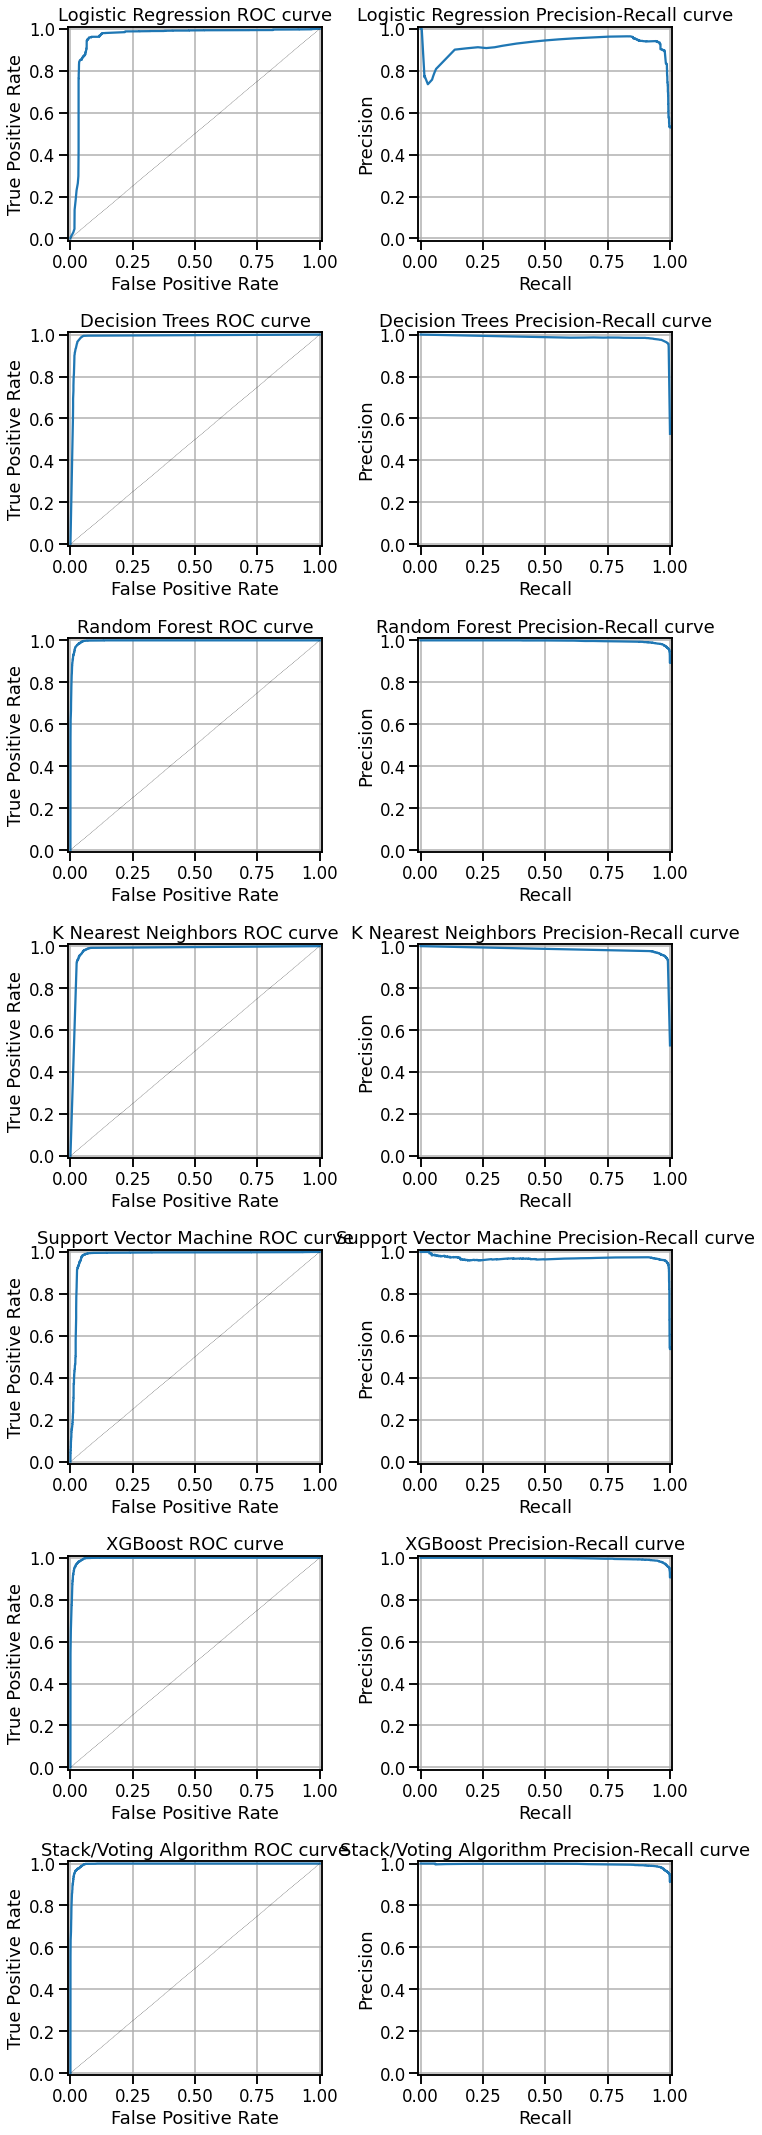

In [ ]:
def ROC_AUC_Curve(true_, tester_data, data):
    sns.set_context('talk')
    fig, axList = plt.subplots(ncols=2, nrows=data.__len__(), figsize=(10,30))

    for i in range(data.__len__()):
        # Calculate everything first
        try:
            y_prob = data[i]['estimator'].predict_proba(data[i]['test_data'][0])
            fpr, tpr, thresholds = roc_curve(data[i]['test_data'][1], y_prob[:,1])
            precision, recall, _ = precision_recall_curve(data[i]['test_data'][1], y_prob[:,1])
        except KeyError:
            y_prob = data[i]['estimator'].predict_proba(tester_data)
            fpr, tpr, thresholds = roc_curve(true_, y_prob[:,1])
            precision, recall, _ = precision_recall_curve(true_, y_prob[:,1])

        # Plot the ROC-AUC curve
        ax = axList[i, 0]

        ax.plot(fpr, tpr)
        ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
        ax.set(xlabel='False Positive Rate',
               ylabel='True Positive Rate',
               xlim=[-.01, 1.01], ylim=[-.01, 1.01],
               title= data[i]['type'] + ' ROC curve')
        ax.grid(True)

        # Plot the precision-recall curve
        ax = axList[i, 1]

        ax.plot(recall, precision)
        ax.set(xlabel='Recall', ylabel='Precision',
               xlim=[-.01, 1.01], ylim=[-.01, 1.01],
               title= data[i]['type'] + ' Precision-Recall curve')
        ax.grid(True)

    plt.tight_layout()


ROC_AUC_Curve(y_test, X_test, model_dictionary)


#### ROC-AUC Score

In [ ]:
ROC_AUC_pd = pd.DataFrame(columns=['Test type', 'ROC-AUC Score'])
for i in model_dictionary:
    try:
        temp = pd.DataFrame({'Test type' : [i['type']], 'ROC-AUC Score' : [roc_auc_score(i['test_data'][1], i['predictions'])]})
        ROC_AUC_pd = pd.concat([ROC_AUC_pd, temp], keys=[i for i in ROC_AUC_pd.columns], ignore_index=True)
    except KeyError:
        temp = pd.DataFrame({'Test type' : [i['type']], 'ROC-AUC Score' : [roc_auc_score(y_test, i['predictions'])]})
        ROC_AUC_pd = pd.concat([ROC_AUC_pd, temp], keys=[i for i in ROC_AUC_pd.columns], ignore_index=True)

ROC_AUC_pd

,Test type,ROC-AUC Score
0,Logistic Regression,0.939777
1,Decision Trees,0.971289
2,Random Forest,0.974740
3,K Nearest Neighbors,0.962590
4,Support Vector Machine,0.967127
5,XGBoost,0.971274
6,Stack/Voting Algorithm,0.971595


### Confusion Matrix

Text(0.5, 0.98, 'Confusion Matrix Across Different Algorithms')

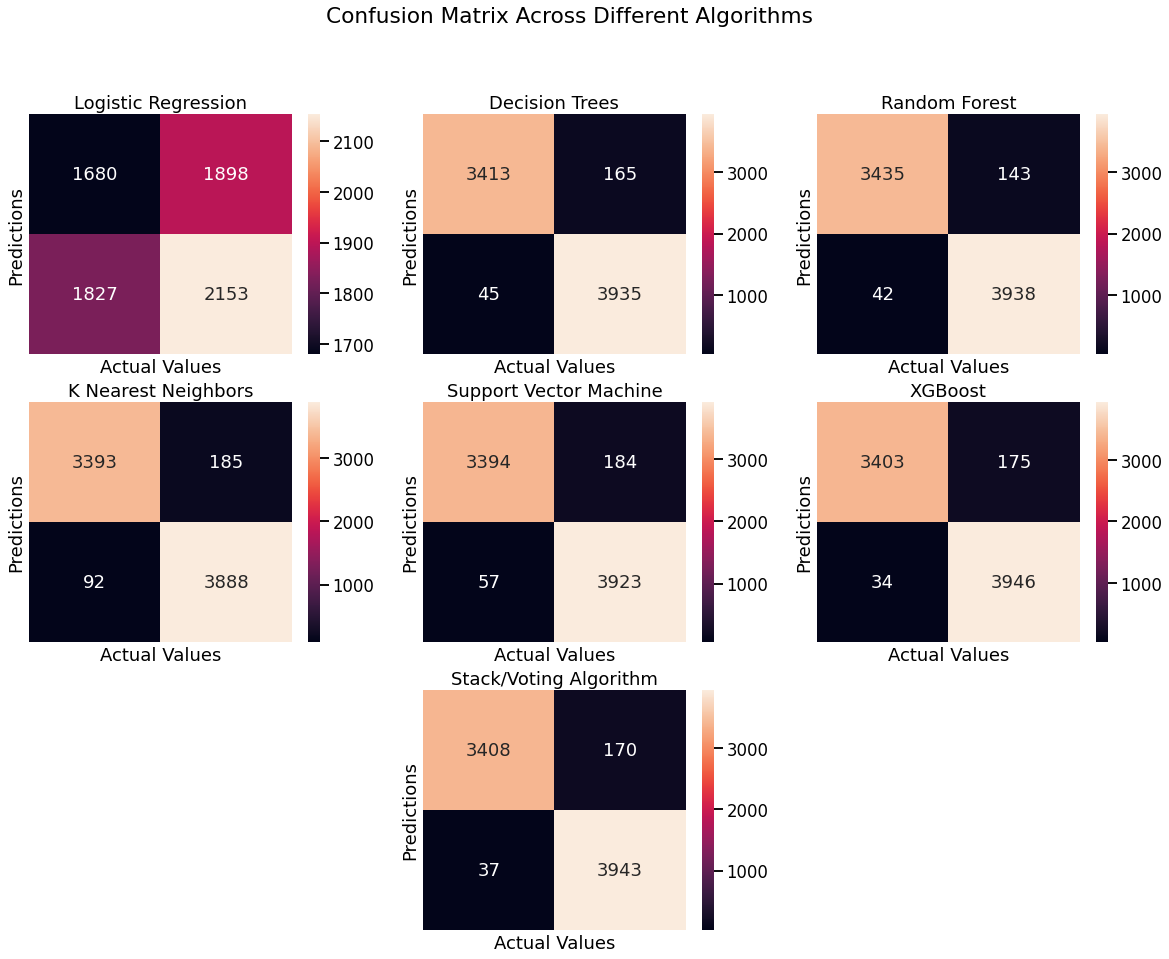

In [ ]:
fig, axList = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
for y in range(2):
    for j in range(3):
        try:
            sns.heatmap(confusion_matrix(i['test_data'][1], model_dictionary[((y*3)+j)]['predictions']), annot=True, fmt='d', ax=axList[y, j])
        except KeyError:
            sns.heatmap(confusion_matrix(y_test, model_dictionary[((y*3)+j)]['predictions']), annot=True, fmt='d', ax=axList[y, j])
        axList[y, j].set_title(model_dictionary[((y*3)+j)]['type'])
        axList[y, j].tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
        axList[y, j].set(xlabel='Actual Values', ylabel='Predictions')

try:
    sns.heatmap(confusion_matrix(model_dictionary[-1]['test_data'][1], model_dictionary[-1]['predictions']), annot=True, fmt='d', ax=axList[2, 1])
except KeyError:
    sns.heatmap(confusion_matrix(y_test, model_dictionary[-1]['predictions']), annot=True, fmt='d', ax=axList[2, 1])
axList[2, 1].set_title(model_dictionary[-1]['type'])
axList[2, 1].tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
axList[2, 1].set(xlabel='Actual Values', ylabel='Predictions')
axList[2, 0].axis('off')
axList[2, 2].axis('off')

fig.suptitle('Confusion Matrix Across Different Algorithms')


## Comparison and Interpretation

<u>***Based on the Performance Metrics amongst different Algorithms, Random Forest works best according to the data given. It has both the highest Test and Training Accuracy, performs the best according to the ROC-AUC Curve, and with Lowest misclassifications based on the Confusion Matrix. This is followed by Decision Trees, followed by KNN, SVM, Logistic Regression, and lastly, Naïve Bayes. The different Machine Learning algorithms shows no signs of Underfitting, nor Overfitting. The data used was cleaned well, and performs well with regards to these Classification Algorithms. Furthermore, Hyperparameter Tuning may be done to achieve the best of the results, but with the given time constraint, These algorithms produced a great output with the data.***</u>

## Unsupervised Learning

### Agglomerative Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data.drop(columns='class'))


steps = [('scaler', StandardScaler()), ('estimator', AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)), ]
AGPL = Pipeline(steps).fit(cluster_data_X)
AGPLPred = AGPL.fit_predict(cluster_data_X)

In [ ]:
AC_data = data.copy()
AC_data['AggloClus'] = AGPLPred
(AC_data[['class','AggloClus']]
 .groupby(['class','AggloClus'])
 .size()
 .to_frame()
 .rename(columns={0:'number'})).style.set_properties(**{'text-align': 'center'})

*Another name for Agglomerative Clustering is AGNES (Agglomerative Nesting). Each object is first treated as a singleton cluster by the algorithm. Once all clusters have been merged into a single large cluster containing all items, pairs of clusters are gradually combined. The outcome is a dendrogram, which is a tree-based representation of the objects.In the agglomerative clustering results, it can be seen that the accuracy is very high. Only 26 percent got the wrong prediction on 0 or normal. While, the 1 or anomaly detection had an accuracy of almost 95%. This indicates that the model had a good performance in detecting the correct clusters.*

#### Dendrogram from Agglomerative Clustering

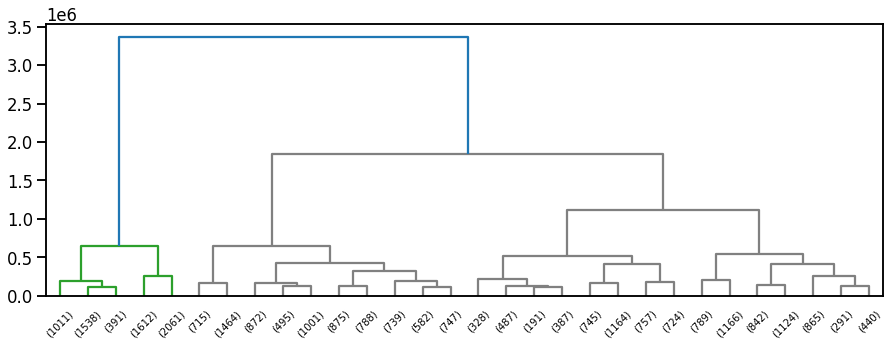

In [ ]:
from scipy.cluster import hierarchy
from matplotlib import colors

Z = hierarchy.linkage(AGPL.named_steps['estimator'].children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

Looking at the dendrogram we can see that there are multiple cluster groups that have formed. We can also see that when there are two clusters, it represent the most appropriate cluster for the data points to be represented due to the fact that it has the longest vertical representation compared to other clusters. It spans from y = 3.4 to y = 0.6, at which, one cluster splits until 3 clusters remained in the lefthand side. On the other hand, the righthand side cluster was earlier to form multiple cluster groups which led to them having more created cluster groups than the lefthand side cluster.

### K Means



In [ ]:
steps = [('scaler', StandardScaler()), ('estimator', KMeans(n_clusters=2, random_state=42, n_init=10))]
KMPL = Pipeline(steps).fit(x)
KMPred = data.copy()
KMPred['KMeans'] = KMPL.predict(x)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)
def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list), X_train, X_test, y_train, y_test


estimator = RanFor
roc_with_kmeans, sss_X, sss_Xt, sss_y, sss_yt = get_avg_roc_10splits(estimator, KMPred, Y)
roc_without_kmeans, sss_X2, sss_Xt2, sss_y2, sss_yt2 = get_avg_roc_10splits(estimator, x, Y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9967768725777111"
Using kmeans cluster as input to Random Forest, roc-auc is "1.0"


## Metrics for KMeans with Random Forest

In [ ]:
model_dictionary = [{'estimator' : estimator, 'type' : 'Random Forest with KMeans' , 'predictions': estimator.fit(sss_X, sss_y).predict(sss_Xt)},
                    {'estimator' : estimator, 'type' : 'Random Forest without KMeans' , 'predictions': estimator.fit(sss_X2, sss_y2).predict(sss_Xt2)}]

### Accuracy

In [ ]:
accuracy_data = pd.DataFrame(columns=['Test type', 'Test Accuracy', 'Train Accuracy'])
for i in model_dictionary:
    temp = pd.DataFrame({'Test type': [i['type']],
                         'Test Accuracy': [accuracy_score(sss_yt,i['predictions']) if model_dictionary.index(i)<<1 else accuracy_score(sss_yt2,i['predictions'])],
                         'Train Accuracy' : [accuracy_score(sss_y, i['estimator'].fit(sss_X, sss_y).predict(sss_X)) if model_dictionary.index(i)<<1 else accuracy_score(sss_y2, i['estimator'].fit(sss_X2, sss_y2).predict(sss_X2))]}, index=[0])
    accuracy_data = pd.concat([accuracy_data, temp], keys=[i for i in accuracy_data.columns], ignore_index=True)

accuracy_data

,Test type,Test Accuracy,Train Accuracy
0,Random Forest with KMeans,1.000000,0.986856
1,Random Forest without KMeans,0.981349,1.000000


*Unsupervised learning algorithm K-Means Clustering divides the unlabeled dataset into various clusters. K is the number of clusters that will be formed by the model. The clusters depend on the similarity of the datapoints with respect to the number of clusters set by the parameters. It can be seen here that the model had a good performance since it resulted in a high accuracy. The Random forest  with K-means had a result of 100%. On the other hand, the Random Forest with K-means resulted with a 98% accuracy. Therefore, random forest with k-means performed slightly better since it had a 2% increase compared to without the K-means.*

### Classification Report

In [ ]:
for i in model_dictionary:
    print(f'{i["type"]}:')
    print(classification_report(sss_yt, i['predictions'])) if model_dictionary.index(i)<<1 else print(classification_report(sss_yt2, i['predictions']))
    print('\n\n')

Random Forest with KMeans:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1175
           1       1.00      1.00      1.00      1345

    accuracy                           1.00      2520
   macro avg       1.00      1.00      1.00      2520
weighted avg       1.00      1.00      1.00      2520




Random Forest without KMeans:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1175
           1       0.98      0.99      0.98      1345

    accuracy                           0.98      2520
   macro avg       0.98      0.98      0.98      2520
weighted avg       0.98      0.98      0.98      2520






### ROC-AUC

#### ROC-AUC Curve

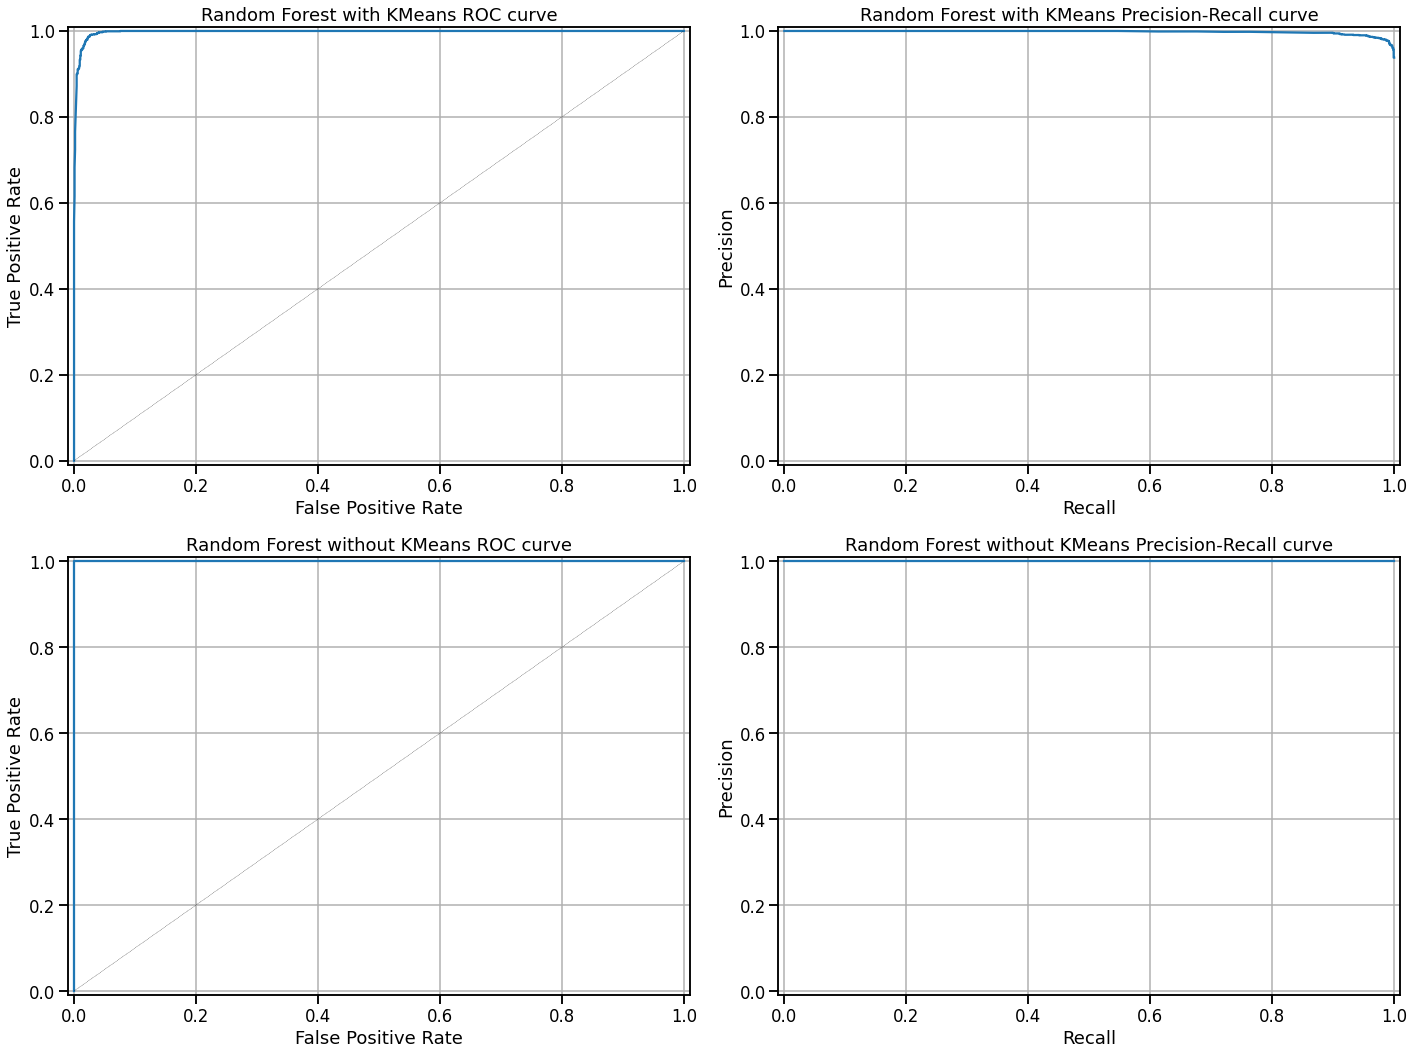

In [ ]:
def ROC_AUC_Curve(true_, true2_, tester_data, tester_data2, data):
    sns.set_context('talk')
    fig, axList = plt.subplots(ncols=2, nrows=data.__len__(), figsize=(20,15))

    for i in range(data.__len__()):
        # Predict Probabilities
        y_prob = data[i]['estimator'].fit(sss_X, sss_y).predict_proba(tester_data) if i<<1 else data[i]['estimator'].fit(sss_X2, sss_y2).predict_proba(tester_data2)

        # Plot the ROC-AUC curve
        ax = axList[i, 0]

        fpr, tpr, thresholds = roc_curve(true_, y_prob[:,1]) if i<<1 else roc_curve(true2_, y_prob[:,1])
        ax.plot(fpr, tpr)
        ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
        ax.set(xlabel='False Positive Rate',
               ylabel='True Positive Rate',
               xlim=[-.01, 1.01], ylim=[-.01, 1.01],
               title= data[i]['type'] + ' ROC curve')
        ax.grid(True)

        # Plot the precision-recall curve
        ax = axList[i, 1]

        precision, recall, _ = precision_recall_curve(true_, y_prob[:,1]) if i<<1 else precision_recall_curve(true2_, y_prob[:,1])
        ax.plot(recall, precision)
        ax.set(xlabel='Recall', ylabel='Precision',
               xlim=[-.01, 1.01], ylim=[-.01, 1.01],
               title= data[i]['type'] + ' Precision-Recall curve')
        ax.grid(True)

    plt.tight_layout()


ROC_AUC_Curve(sss_yt, sss_yt2, sss_Xt, sss_Xt2, model_dictionary)


#### ROC-AUC Score

In [ ]:
ROC_AUC_pd = pd.DataFrame(columns=['Test type', 'ROC-AUC Score'])
for i in model_dictionary:
    temp = pd.DataFrame({'Test type' : [i['type']], 'ROC-AUC Score' : [roc_auc_score(sss_yt, i['predictions']) if model_dictionary.index(i)<<1 else roc_auc_score(sss_yt2, i['predictions'])]})
    ROC_AUC_pd = pd.concat([ROC_AUC_pd, temp], keys=[i for i in ROC_AUC_pd.columns], ignore_index=True)

ROC_AUC_pd

,Test type,ROC-AUC Score
0,Random Forest with KMeans,1.000000
1,Random Forest without KMeans,0.980753


*Both the random forest with and without KMeans performed well because the ROC score indicates how well the model performed in predicting the true positive and true negative in the dataset. The Random Forest with KMeans had a 100% ROC score, as can be shown, whereas the Random Forest without KMeans had a score of 98.1%. As a result, it did a good job of predicting the genuine positives and true negatives.*

### Confusion Matrix

Text(0.5, 0.98, 'Confusion Matrix on Random Forest')

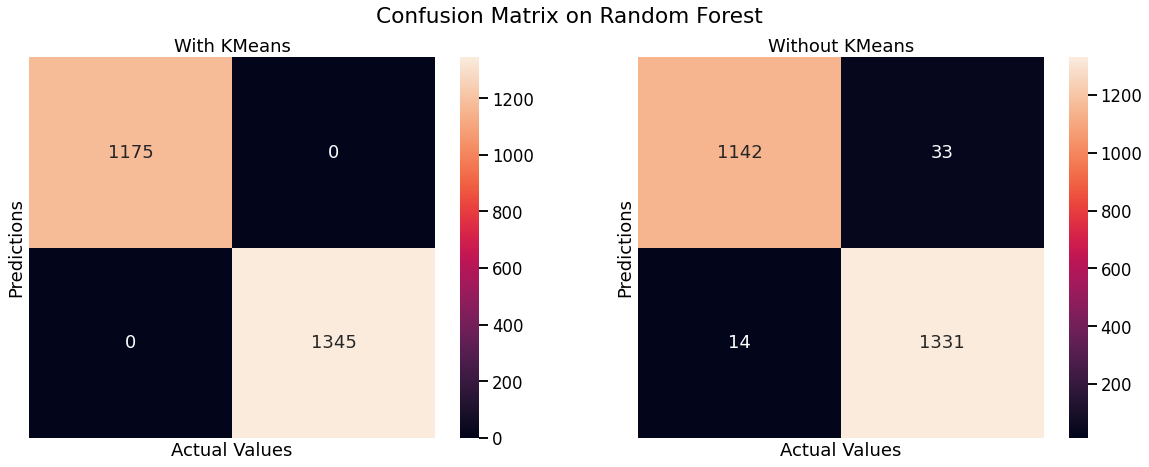

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
for j in range(2):
    sns.heatmap(confusion_matrix(sss_yt, model_dictionary[j]['predictions']) if j<<1 else confusion_matrix(sss_yt2, model_dictionary[j]['predictions']), annot=True, fmt='d', ax=axList[j])
    axList[j].set_title("Without KMeans" if j<<1 else "With KMeans")
    axList[j].tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    axList[j].set(xlabel='Actual Values', ylabel='Predictions')

fig.suptitle('Confusion Matrix on Random Forest')

*The random forest with K-Means produced a result with all the values discovered in the true positive, as can be seen in the confusion matrix. Since the final accuracy is 100%, there are no false positives and false negatives present. On the other hand, the false positives and false negatives for the random forest without K-means are 33 and 13, respectively. This is expected given that the accuracy of random forest without K-Means is 98%.*

## Dimensionality Reduction with Sklearn Pipeline

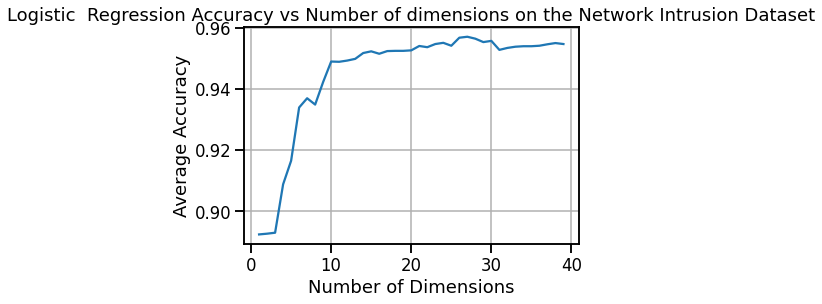

In [ ]:
X = cluster_data.drop('class', axis=1)
y = cluster_data['class']
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LR(max_iter = 9000))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [x for x in range(1, cluster_data.shape[1])]
score_list = [get_avg_score(n) for n in ns]

# -- For plotting --
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='Logistic  Regression Accuracy vs Number of dimensions on the Network Intrusion Dataset')
ax.grid(True)

Looking at the graph, we can see that around 24 to 26 number of dimensions have yielded the highest average accuracy amongst the other dimension values tested. Those number of dimension have been able to reach around 95 to 95.6 percent average accuracy. We can also see that after the drop of average accuracy at 31 dimensions, we can see that the average Logistic Regression Accuracy started to stabilize moving forward. Unlike the average accuracy values before 30, wherein the average accuracy values are volatile, it exhibits signs of stabilization and settlement of average accuracy values for Logistic Regression, starting from 30 number of dimensions.

*Conclusion*

*In conclusion, the models with the highest accuracy in supervised machine learning have all tied accuracy results for the models XGBoost, Stacking, and Random Forest, and Decision Trees which resulted in over 98%. The lowest accuracy was logistic regression with a result of 94%. This is a good result since it indicates that most supervised machine learning algorithms are fit for the dataset. On the other hand, the unsupervised learning had all models having an accuracy result greater than 97%. Therefore, it performed greatly in making predictions and grouping the target column without setting the needed amount of groups by the students. Hence, the given unsupervised machine learning algorithms are a good fit for the dataset.*

*Reflection*

*Reflecting on what we have done, we can confidently say that we are able to understand and apply the concepts that we’ve learned throughout the semester in regards to the topic of Machine Learning. We are able to obtain the dataset that matches the topic that we’ve chosen (Network Intrusion Dataset). We are able to properly process, visualise, and transform the data according to the needs of the different algorithms that we’ve used, whether it is a Supervised or Unsupervised Learning type of algorithm. In the end, we are then able to apply the different algorithms to our dataset in order to create a good model wherein we are able to obtain a very high accuracy and other metrics which proves the usefulness and reliability of our implementation.*